In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

import numpy as np
import seaborn as sns

#Importing necessary Classifiers.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\himi\btp\dataverse_files\segmentation\dataset9.csv")

In [3]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,3.600000e+02,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,3.600000e+02,360.000000,360.000000,360.000000,360.000000
mean,2050.594528,184.413889,381.336111,982.769222,763.294444,3.002901,8.067155e+04,0.983752,6691.304167,1.362344,...,92.533333,364.161111,1154.391444,722.177778,5.302053,6.703444e+04,1.155544,5028.108556,1.648859,3.500000
std,5347.520840,76.985932,130.449366,1469.521573,260.251329,8.476664,8.320191e+05,1.470995,40072.771294,2.203518,...,62.606335,183.481486,949.010020,362.874253,6.247501,3.599663e+05,0.949957,15604.669772,1.523434,1.710202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,611.465000,154.750000,396.000000,517.225000,795.000000,0.834590,6.965325e+02,0.517745,450.092500,0.671228,...,54.750000,419.750000,682.642500,845.750000,1.919200,3.683250e+03,0.683323,772.885000,0.879578,2.000000
50%,896.960000,206.500000,412.000000,589.940000,826.000000,1.208950,1.461600e+03,0.590530,577.960000,0.760615,...,96.500000,448.000000,1127.400000,893.000000,4.598450,2.114600e+04,1.128500,2410.250000,1.553250,3.500000
75%,1578.525000,241.000000,441.000000,955.177500,887.000000,2.125425,4.517525e+03,0.956143,1592.100000,1.262400,...,131.000000,467.000000,1629.825000,924.000000,7.226550,5.222275e+04,1.631450,5358.450000,2.316000,5.000000
max,77744.000000,294.000000,510.000000,16510.000000,987.000000,123.390000,1.522500e+07,16.527000,606700.000000,24.644000,...,326.000000,535.000000,7524.600000,983.000000,80.004000,6.400700e+06,7.532100,236090.000000,15.373000,6.000000


In [4]:
df.isnull().sum().sum()

0

In [5]:
np.isinf(df).sum().sum()

0

In [6]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351
0,590.10,259,396,528.90,815,0.80881,654.17,0.52943,447.74,0.66947,...,130,457,1462.20,921,4.6327,21462.0,1.46370,3613.9,1.9020,1
1,684.38,254,401,582.92,804,0.95351,909.19,0.58350,579.73,0.76178,...,117,430,911.01,881,2.9814,8888.5,0.91192,1403.6,1.1853,1
2,610.73,263,397,546.60,809,0.84223,709.35,0.54715,505.30,0.71120,...,133,456,1783.30,935,5.4364,29554.0,1.78500,5426.6,2.3307,1
3,644.44,247,407,588.72,805,0.94631,895.50,0.58931,733.88,0.85710,...,134,465,1921.20,942,5.4379,29570.0,1.92310,6297.7,2.5108,1
4,613.44,220,391,486.17,781,0.86433,747.07,0.48666,409.37,0.64014,...,103,471,1784.80,936,6.4143,41144.0,1.78660,5429.0,2.3312,1


In [7]:
# #Applying Standardscalar for scaling the features.
scaler = StandardScaler()
df_feat = scaler.fit_transform(df.drop(['1351'],axis=1))
df_feat=pd.DataFrame(df_feat)

In [8]:
df_feat

,0,1,2,3,4,5,6,7,8,9,...,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349
0,-0.273496,0.970176,0.112567,-0.309285,0.198952,-0.259199,-0.096306,-0.309283,-0.156022,-0.314878,...,-0.082605,0.599281,0.506689,0.324798,0.548672,-0.107288,-0.126778,0.324841,-0.090753,0.166396
1,-0.255841,0.905139,0.150949,-0.272474,0.156626,-0.242105,-0.095999,-0.272474,-0.152724,-0.272927,...,-0.339068,0.391346,0.359331,-0.256815,0.438288,-0.371970,-0.161756,-0.256815,-0.232594,-0.304709
2,-0.269633,1.022206,0.120244,-0.297223,0.175865,-0.255251,-0.096240,-0.297220,-0.154584,-0.295913,...,0.058420,0.647267,0.501232,0.663622,0.587307,0.021534,-0.104267,0.663538,0.025572,0.448191
3,-0.263320,0.814087,0.197008,-0.268521,0.160474,-0.242956,-0.096016,-0.268519,-0.148872,-0.229609,...,0.064427,0.663262,0.550351,0.809133,0.606624,0.021775,-0.104222,0.809115,0.081473,0.566575
4,-0.269126,0.462885,0.074185,-0.338403,0.068127,-0.252640,-0.096195,-0.338399,-0.156981,-0.328207,...,0.184375,0.167415,0.583097,0.665205,0.590066,0.178279,-0.072025,0.665225,0.025726,0.448520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-0.231038,-0.005384,0.104891,-0.315316,0.160474,-0.219377,-0.095513,-0.315315,-0.156164,-0.316814,...,-0.806682,-1.480076,-1.987492,-1.218109,-1.992930,-0.849849,-0.186483,-1.218110,-0.322667,-1.083837
356,-0.193891,0.241758,0.289126,-0.207375,0.225886,-0.167870,-0.094082,-0.207374,-0.142634,-0.168208,...,-0.806682,-1.480076,-1.987492,-1.218109,-1.992930,-0.849849,-0.186483,-1.218110,-0.322667,-1.083837
357,-0.199303,0.007624,0.327508,-0.261448,0.298994,-0.198999,-0.095002,-0.261446,-0.152526,-0.270573,...,-0.806682,-1.480076,-1.987492,-1.218109,-1.992930,-0.849849,-0.186483,-1.218110,-0.322667,-1.083837
358,-0.212690,0.319803,0.243067,-0.271431,0.210495,-0.202755,-0.095101,-0.271433,-0.153136,-0.277885,...,-0.806682,-1.480076,-1.987492,-1.218109,-1.992930,-0.849849,-0.186483,-1.218110,-0.322667,-1.083837


In [9]:
# Define a list to store the performance metrics for each classifier.
metrics_val = []
metrics_test=[]

# Initializing the classifiers.
classifiers = [
    RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(n_neighbors=5),
    Perceptron(),
]

In [10]:
#Test-(Train & Validation) Split

df_feat=pd.concat([df_feat,df['1351']],axis=1)
#No.of trials per activity.
group_size =6

# Create empty DataFrame for test data.
test = pd.DataFrame()

# Loop through each group and select 1 random trials.
for i in range(0, len(df_feat), group_size):
    group = df_feat.iloc[i:i+group_size]
    group_test = group.sample(n=1, random_state=42)  # randomly select 1 trials.
    test = pd.concat([test, group_test])  # add selected trials to test DataFrame.
    group_train = group.drop(index=group_test.index)  # remove selected trials from actual df.
    if i == 0:
        train = group_train
    else:
        train = pd.concat([train, group_train])
  #Drop the '1351' column
labels=train['1351']
train= train.drop('1351', axis=1)
print('Dimensions of Features Matrix: ',train.shape)

Dimensions of Features Matrix:  (300, 1350)


In [11]:
#Testing Dataset.
X_test= test.drop('1351', axis=1)
y_test=test['1351']

print("Dimensions of Test Dataset: ",test.shape)
print("Dimensions of X_test Dataset: ",X_test.shape)
print("Dimensions of y_test Dataset: ",y_test.shape)
 #print(f"{type(clf).__name__} Accuracy: {acc:.3f} Precision: {prec:.3f} Recall: {rec:.3f} F1-Score: {f1:.3f} Kappa-Score: {kappa:.3f}")

Dimensions of Test Dataset:  (60, 1351)
Dimensions of X_test Dataset:  (60, 1350)
Dimensions of y_test Dataset:  (60,)


RandomForestClassifier Accuracy: 0.600 Precision: 0.623 Recall: 0.621 F1-Score: 0.594 Kappa-Score: 0.523


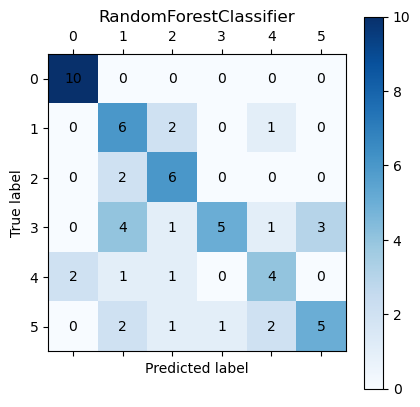

RandomForestClassifier Accuracy: 0.617 Precision: 0.646 Recall: 0.617 F1-Score: 0.616 Kappa-Score: 0.540


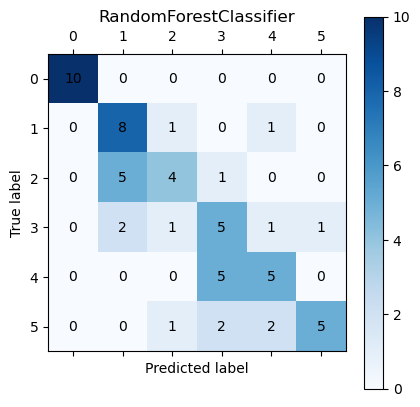

LogisticRegression Accuracy: 0.600 Precision: 0.617 Recall: 0.618 F1-Score: 0.603 Kappa-Score: 0.521


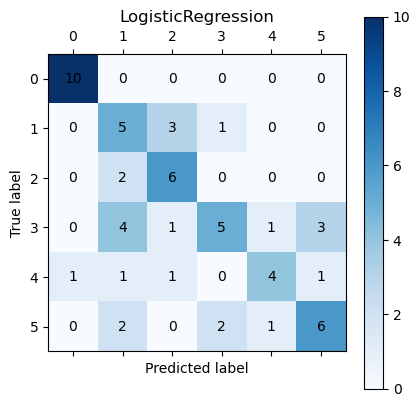

LogisticRegression Accuracy: 0.617 Precision: 0.624 Recall: 0.617 F1-Score: 0.614 Kappa-Score: 0.540


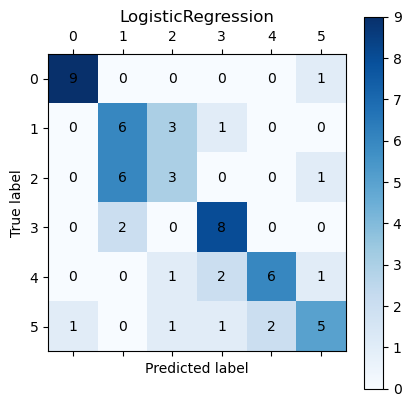

SVC Accuracy: 0.417 Precision: 0.430 Recall: 0.434 F1-Score: 0.402 Kappa-Score: 0.306


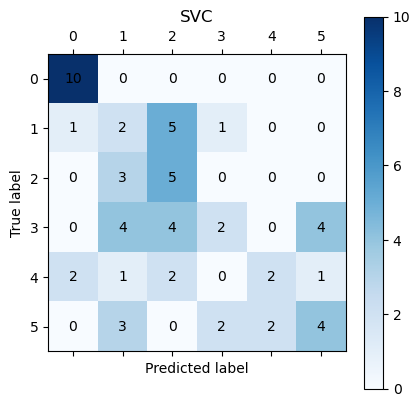

SVC Accuracy: 0.517 Precision: 0.578 Recall: 0.517 F1-Score: 0.512 Kappa-Score: 0.420


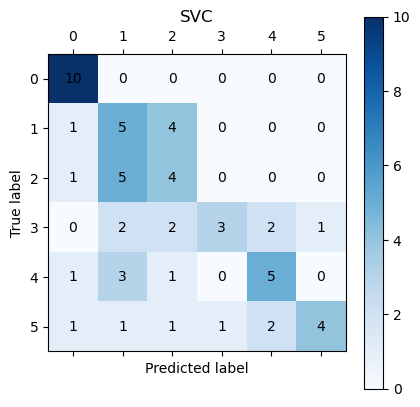

KNeighborsClassifier Accuracy: 0.500 Precision: 0.580 Recall: 0.528 F1-Score: 0.510 Kappa-Score: 0.406


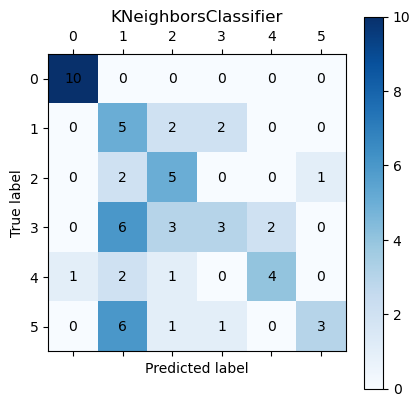

KNeighborsClassifier Accuracy: 0.483 Precision: 0.557 Recall: 0.483 F1-Score: 0.492 Kappa-Score: 0.380


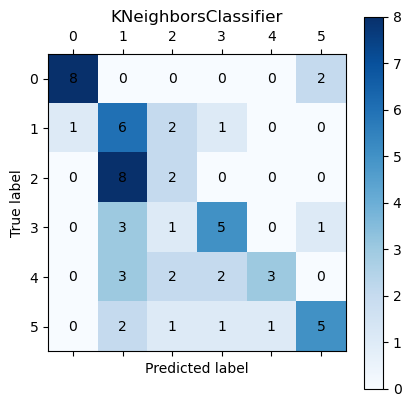

Perceptron Accuracy: 0.600 Precision: 0.597 Recall: 0.620 F1-Score: 0.604 Kappa-Score: 0.518


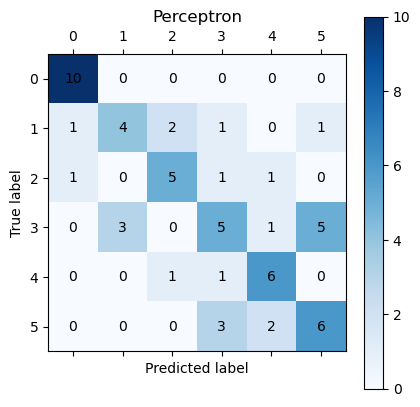

Perceptron Accuracy: 0.633 Precision: 0.638 Recall: 0.633 F1-Score: 0.621 Kappa-Score: 0.560


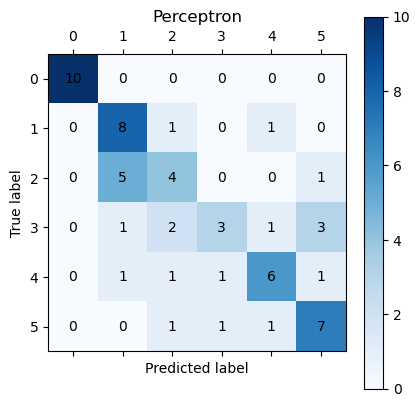

In [12]:
#Train- Validation Split.
X_train, X_val, y_train, y_val = train_test_split(train.values, labels.values, test_size=0.2, random_state=42)

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    cm = confusion_matrix(y_val, y_pred)
    # Calculate the Validation performance metrics.
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='macro')
    rec = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    kappa = cohen_kappa_score(y_val, y_pred)
    metrics_val.append([acc, prec, rec, f1, kappa])
    print(f"{type(clf).__name__} Accuracy: {acc:.3f} Precision: {prec:.3f} Recall: {rec:.3f} F1-Score: {f1:.3f} Kappa-Score: {kappa:.3f}")
    # Plot the confusion matrix.
    
    plt.matshow(cm, cmap='Blues')
    plt.colorbar()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(type(clf).__name__)
    plt.show()
    

    y_pred = clf.predict(X_test)
    
    # Calculate the Testing performance metrics.
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test, y_pred)
    metrics_test.append([acc, prec, rec, f1, kappa])
    print(f"{type(clf).__name__} Accuracy: {acc:.3f} Precision: {prec:.3f} Recall: {rec:.3f} F1-Score: {f1:.3f} Kappa-Score: {kappa:.3f}")
    # Plot the confusion matrix.
    cm = confusion_matrix(y_test, y_pred)
    plt.matshow(cm, cmap='Blues')
    plt.colorbar()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(type(clf).__name__)
    plt.show()

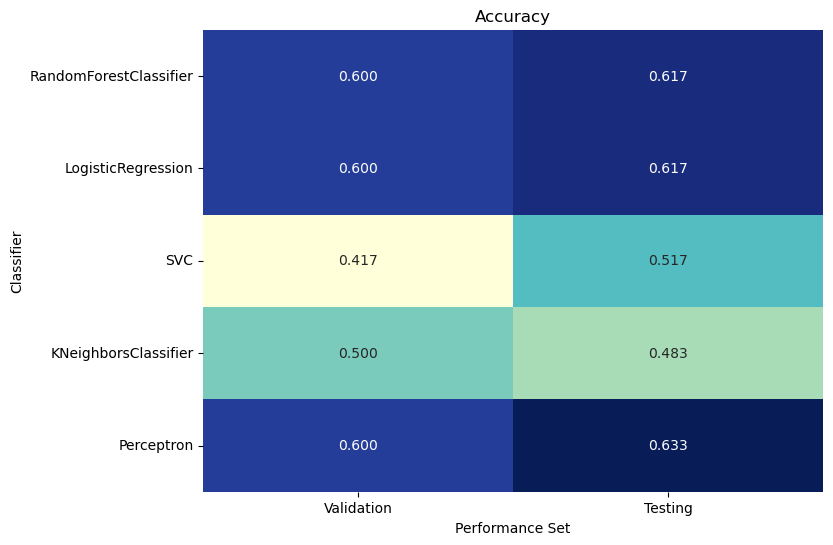

In [13]:
val_kappas = [x[0] for x in metrics_val]
test_kappas = [x[0] for x in metrics_test]

# Concatenate the two arrays row-wise
all_kappas = np.vstack((val_kappas, test_kappas))
csv_file_path = "kappas_data9.csv"
reshaped_kappas = all_kappas.reshape(5, 2)
# Save the data as a CSV file
column_names = ['Train_acc', 'Test_acc']
np.savetxt(csv_file_path, reshaped_kappas, delimiter=',', fmt='%.3f',header=','.join(column_names), comments='')
# Plot the heatmap
plt.subplots(figsize=(8, 6))
ax = sns.heatmap(all_kappas.T, cmap='YlGnBu', annot=True, xticklabels=['Validation', 'Testing'], yticklabels=[type(clf).__name__ for clf in classifiers], fmt='.3f', cbar=False)
ax.set_ylabel('Classifier')
ax.set_xlabel('Performance Set')
ax.set_title('Accuracy')
plt.show()

plt.show()